# Global Power Plant Database


## Importing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib
import scipy as stats
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv("https://github.com/wri/global-power-plant-database/raw/master/source_databases_csv/database_IND.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
dataset 

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
dataset.shape

(907, 27)

# Data Analysis:

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [8]:
dataset.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

# Here we can see most of the data columns are having missing values
'''In some columns we have colplete missing data
latitude and longitude have 46 missing values
other_fuel1, other_fuel2 and other_fuel3 are having large number of missing values
commissioning_year year have 380 nul values and oweners information also missing
wepp_id is completely missing
some of the importtant columns having missing values near about 500, we will decide later, we need to drop or fill the colums.'''

## Drop all the columns which are not relevent.
'''country, country_long are just the name, and here we are data only for india, so droping this will not effect on output.'''

In [9]:
dataset.drop(['country', 'country_long'], inplace= True, axis= 1)

'''wepp_id, generation_data_source, estimated_generation_gwh also not relevent. having so many Nan values, instead of filling we will drop
other_fuel1,other_fuel2, other_fuel3 are also having many Nan values, we will drope them also'''

In [10]:
dataset.drop(['other_fuel1','other_fuel2', 'other_fuel3', 'wepp_id','url','geolocation_source', 
              'generation_data_source', 'estimated_generation_gwh','source','generation_gwh_2019','generation_gwh_2013'], inplace= True, axis= 1)

In [11]:

dataset.drop(['year_of_capacity_data'], inplace= True, axis= 1)

# Filling null values

In [12]:
dataset.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [13]:
dataset['generation_gwh_2014'].fillna(value=dataset['generation_gwh_2014'].median(), inplace= True)
dataset['generation_gwh_2015'].fillna(value=dataset['generation_gwh_2015'].median(), inplace= True)
dataset['generation_gwh_2016'].fillna(value=dataset['generation_gwh_2016'].median(), inplace= True)
dataset['generation_gwh_2017'].fillna(value=dataset['generation_gwh_2017'].median(), inplace= True)
dataset['generation_gwh_2018'].fillna(value=dataset['generation_gwh_2018'].median(), inplace= True)


In [14]:
dataset['latitude'].fillna(value=dataset['latitude'].mean(), inplace= True)
dataset['longitude'].fillna(value=dataset['longitude'].mean(), inplace= True) 
dataset['commissioning_year'].fillna(value=dataset['commissioning_year'].mean(), inplace= True) 

In [15]:
dataset['owner'].fillna(value=dataset['owner'].mode(), inplace= True)

In [16]:
dataset.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
owner                  565
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

# EDA

## Univariate analysis


'''Lets plot the distrubution and conuts for targat and feature columns.'''

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

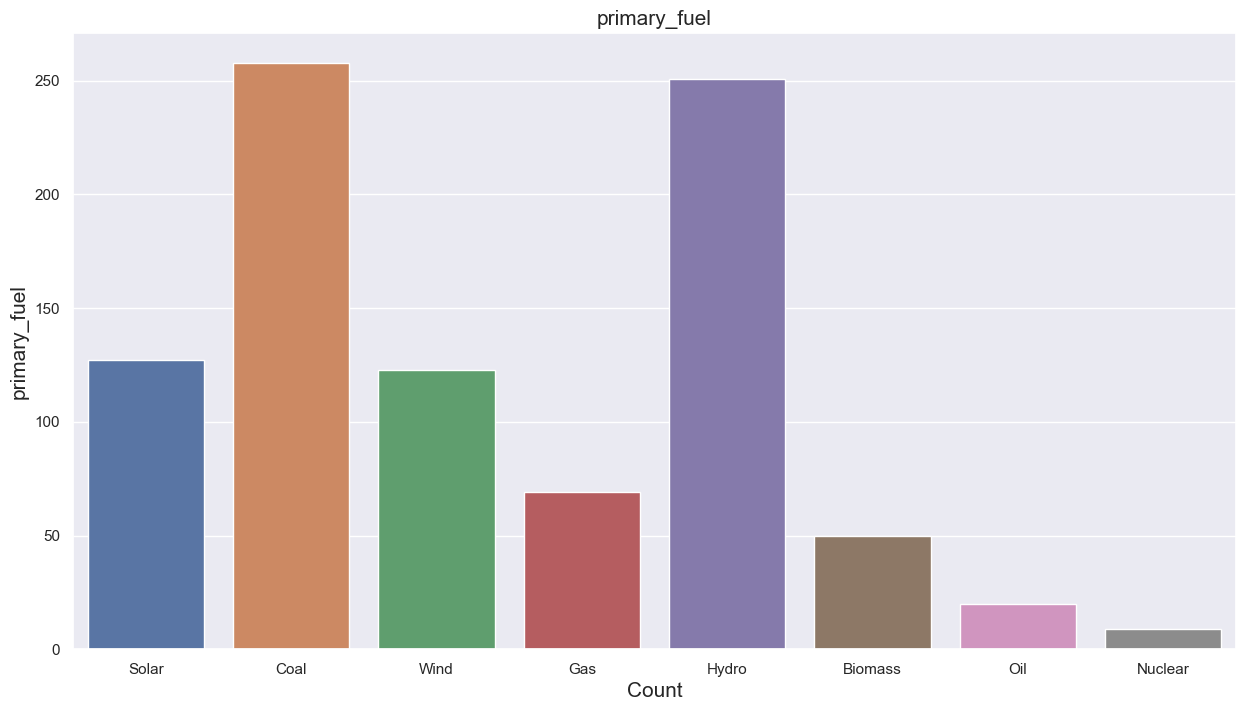

In [17]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
sns.countplot(x='primary_fuel',data=dataset)
plt.xlabel('Count', fontsize=15 )
plt.ylabel('primary_fuel', fontsize=15 )
plt.title('primary_fuel', fontsize=15)

dataset['primary_fuel'].value_counts()

 '''Here we can see, most of the power plants are using Coal and Hydro as the primary fuel.
Coal having maximum counts, which indicates most of the power generation plant using coal af primary fuel.
Use of solar and wind also considerable.'''

In [18]:
dataset['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

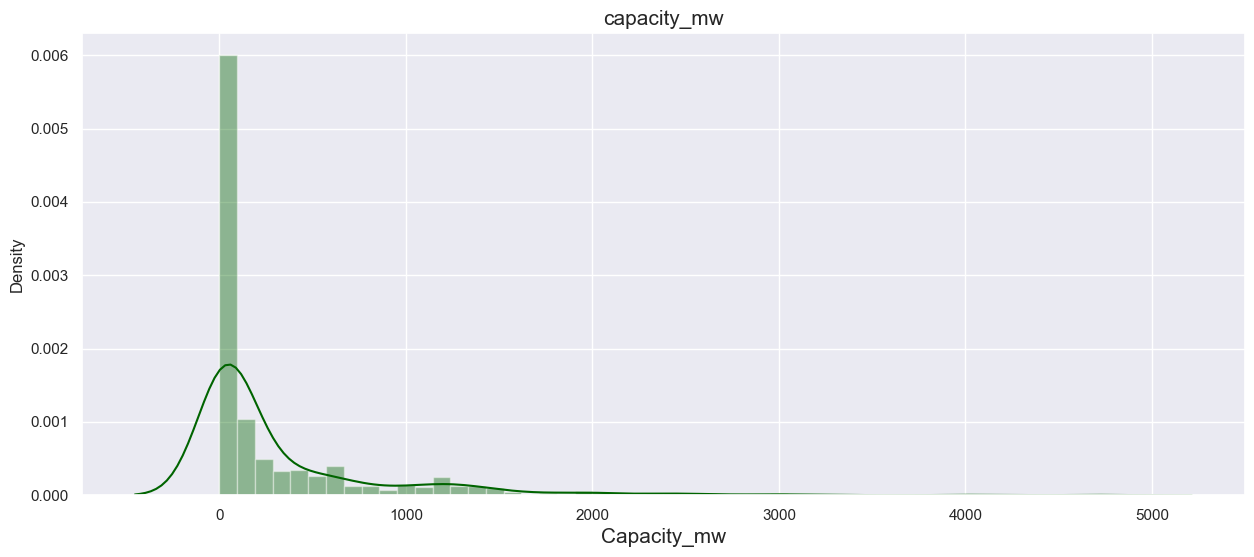

In [19]:
plt.figure(figsize=(15,6))

sns.distplot(dataset['capacity_mw'], color='darkgreen')
plt.title('capacity_mw', fontsize=15)
plt.xlabel('Capacity_mw', fontsize=15)
plt.show()

'''Here we can see the probablity of capacity greater than 1000 is less.

Data is not normaly distributed.

Data having outliers.'''

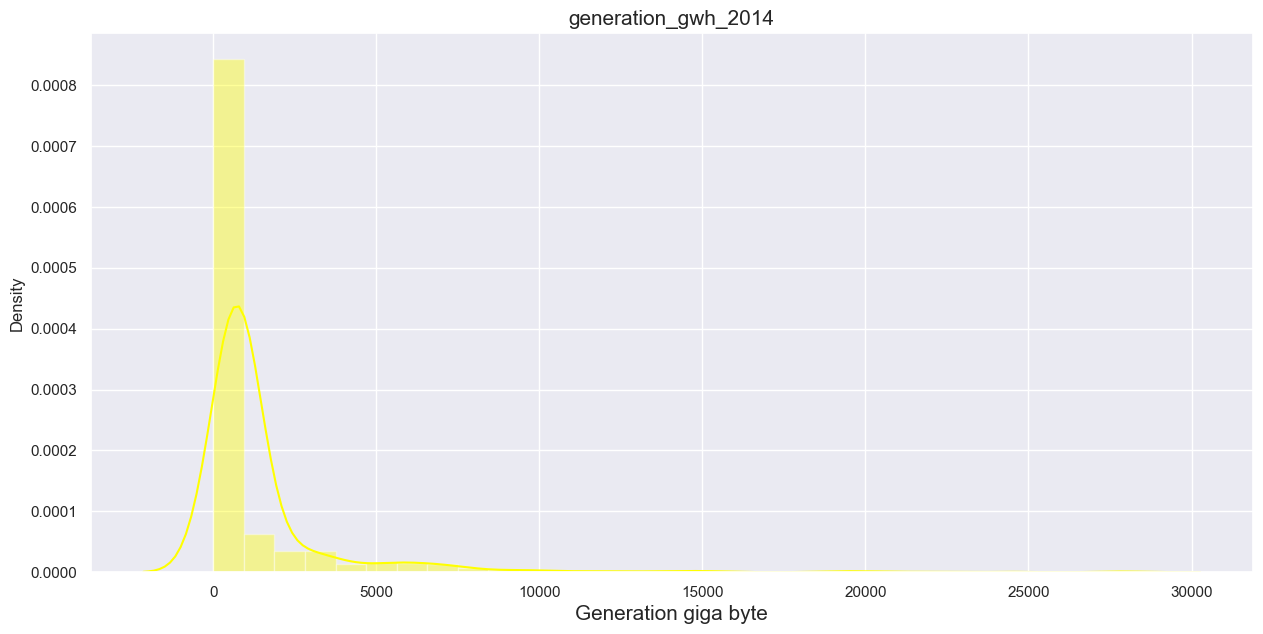

In [20]:
plt.figure(figsize=(15,7))

sns.distplot(dataset['generation_gwh_2014'], color='yellow')
plt.title('generation_gwh_2014', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

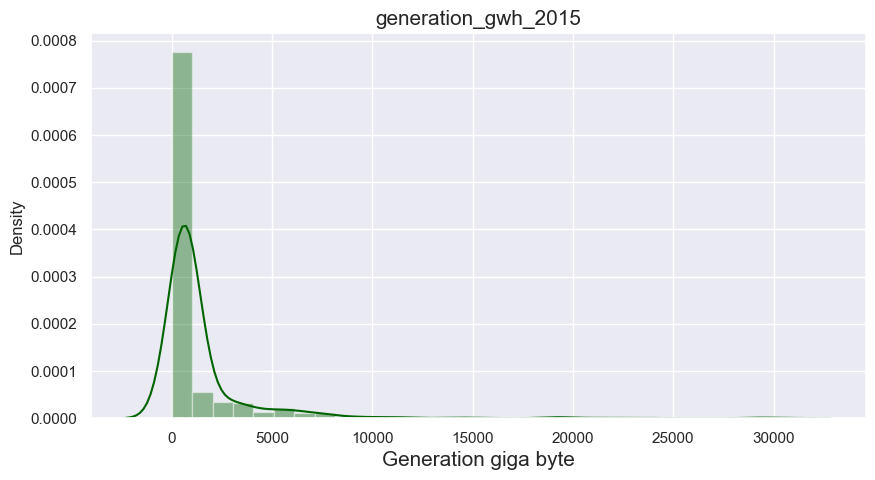

In [21]:
plt.figure(figsize=(10,5))

sns.distplot(dataset['generation_gwh_2015'], color='darkgreen')
plt.title('generation_gwh_2015', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

'''Data is not distributed normally, it is having skewness.'''

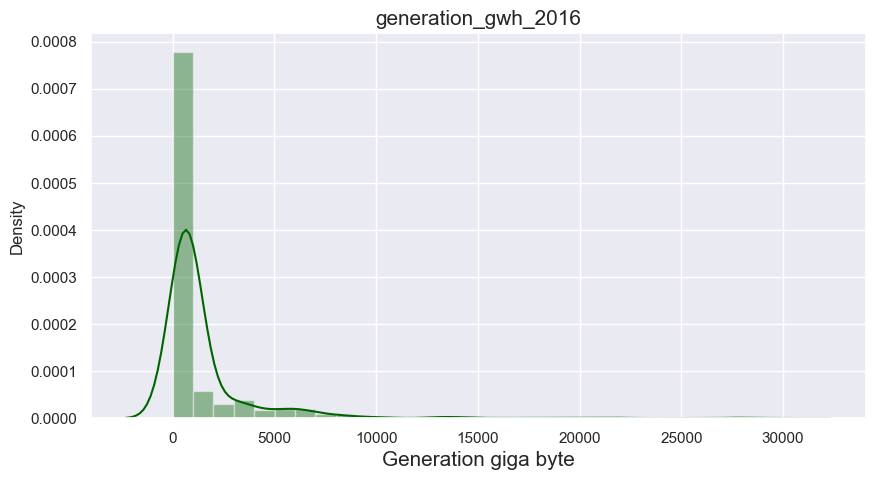

In [22]:
plt.figure(figsize=(10,5))

sns.distplot(dataset['generation_gwh_2016'], color='darkgreen')
plt.title('generation_gwh_2016', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

In [23]:
'''Data is not distributed normally, it is having skewness.'''

'Data is not distributed normally, it is having skewness.'

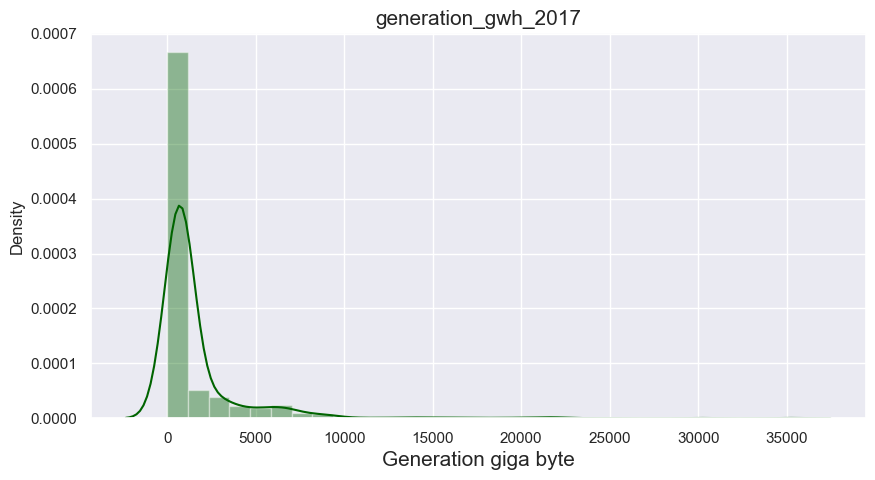

In [24]:
plt.figure(figsize=(10,5))

sns.distplot(dataset['generation_gwh_2017'], color='darkgreen')
plt.title('generation_gwh_2017', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

'''Data is not distributed normally, it is having skewness.'''

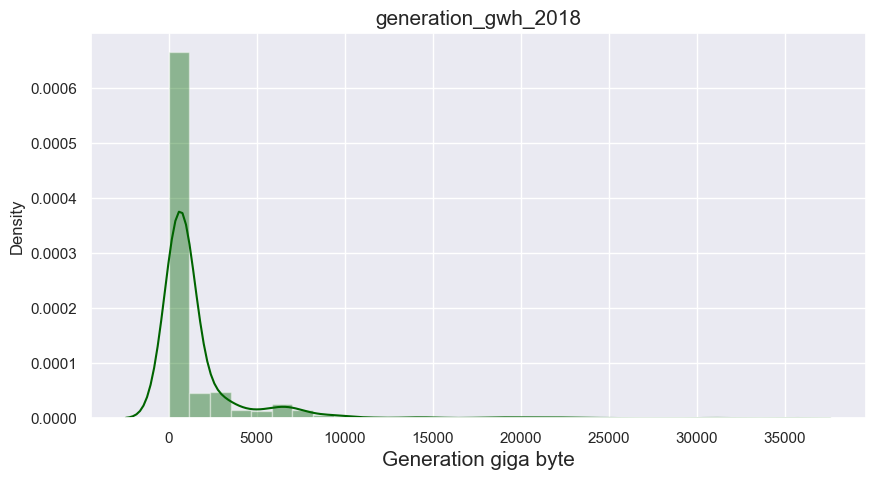

In [25]:
plt.figure(figsize=(10,5))

sns.distplot(dataset['generation_gwh_2018'], color='darkgreen')
plt.title('generation_gwh_2018', fontsize=15)
plt.xlabel('Generation giga byte', fontsize=15)
plt.show()

In [26]:
'''Data is not distributed normally, it is having skewness.'''

'Data is not distributed normally, it is having skewness.'

# Bivariate Analysis
#In bivariate analysis, we will analyse the features columns against target column

In [27]:
cat_columns = []

for i in dataset.dtypes.index:
    if dataset.dtypes[i]=='object':
        cat_columns.append(i)

print(cat_columns)

['name', 'gppd_idnr', 'primary_fuel', 'owner']


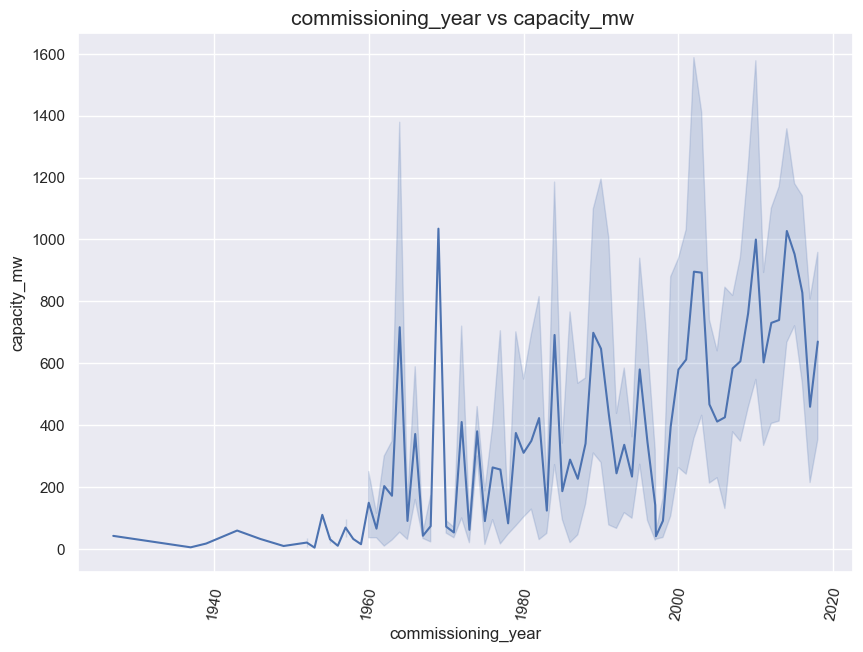

In [28]:
plt.figure(figsize=(10,7))
sns.lineplot(data=dataset, x='commissioning_year',y='capacity_mw')
locs, labels = plt.xticks()
plt.title('commissioning_year vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

#Here we can see with increase in the years the devlopment of plants incerases and and capcaity also incresed.

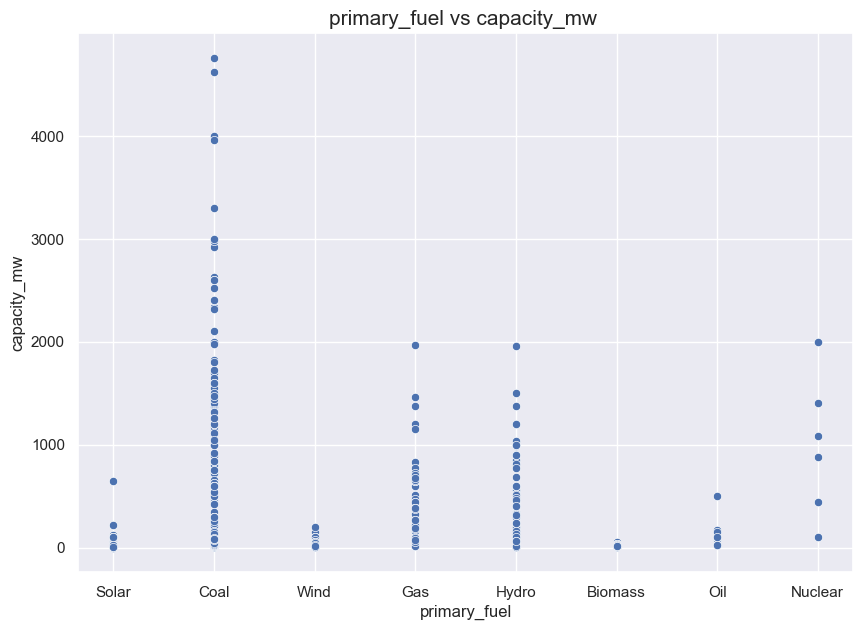

In [29]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=dataset, x='primary_fuel',y='capacity_mw')

plt.title('primary_fuel vs capacity_mw ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

#We can see most of the power capacity is due to coal.

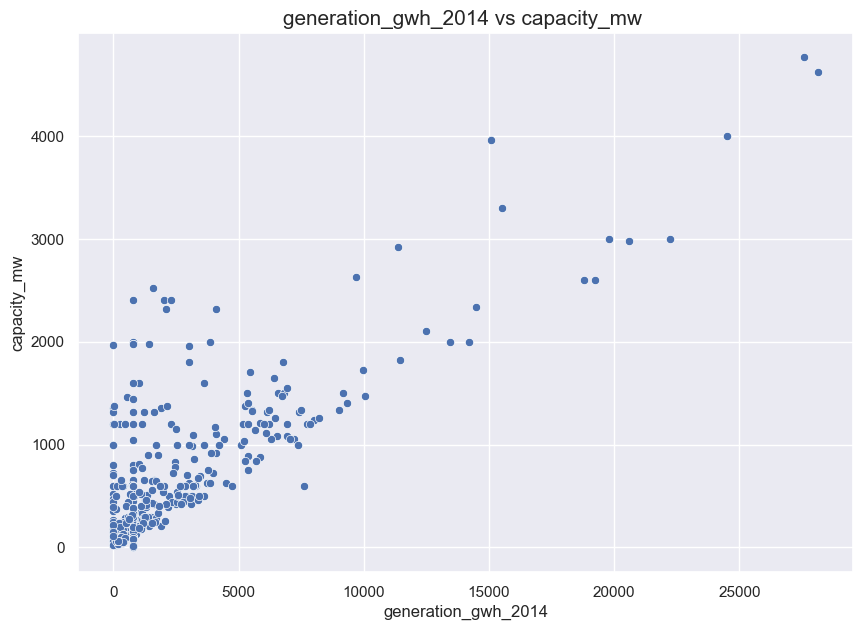

In [30]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=dataset, x='generation_gwh_2014',y='capacity_mw')

plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)

plt.show()

In [31]:
#with higher capacity, generation_gwh_2014 also incresing.

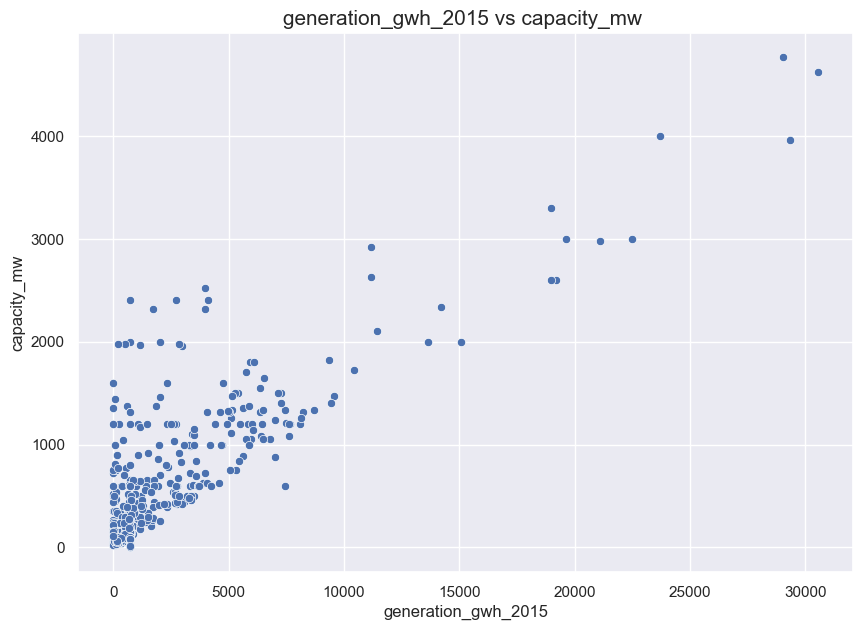

In [32]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=dataset, x='generation_gwh_2015',y='capacity_mw')

plt.title('generation_gwh_2015 vs capacity_mw ', fontsize=15)

plt.show()

In [33]:
#with higher capacity, generation_gwh_2015 also incresing.

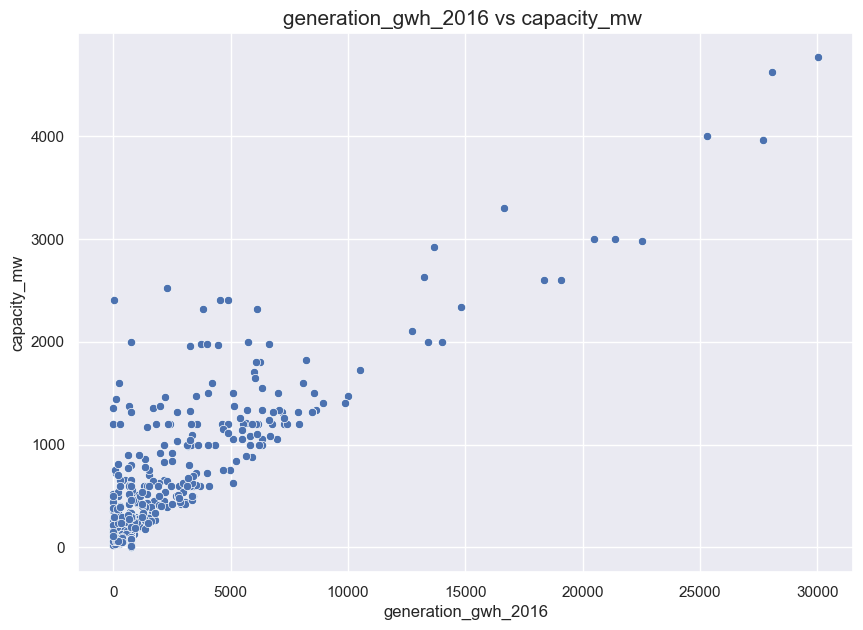

In [34]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=dataset, x='generation_gwh_2016',y='capacity_mw')

plt.title('generation_gwh_2016 vs capacity_mw ', fontsize=15)

plt.show()

In [35]:
#with higher capacity, generation_gwh_2016 also incresing.

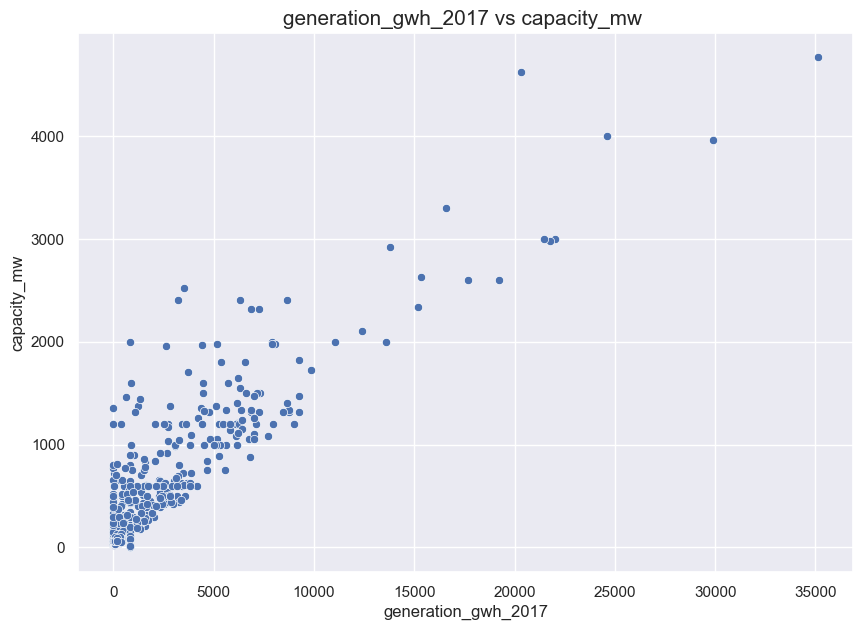

In [36]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=dataset, x='generation_gwh_2017',y='capacity_mw')

plt.title('generation_gwh_2017 vs capacity_mw ', fontsize=15)

plt.show()

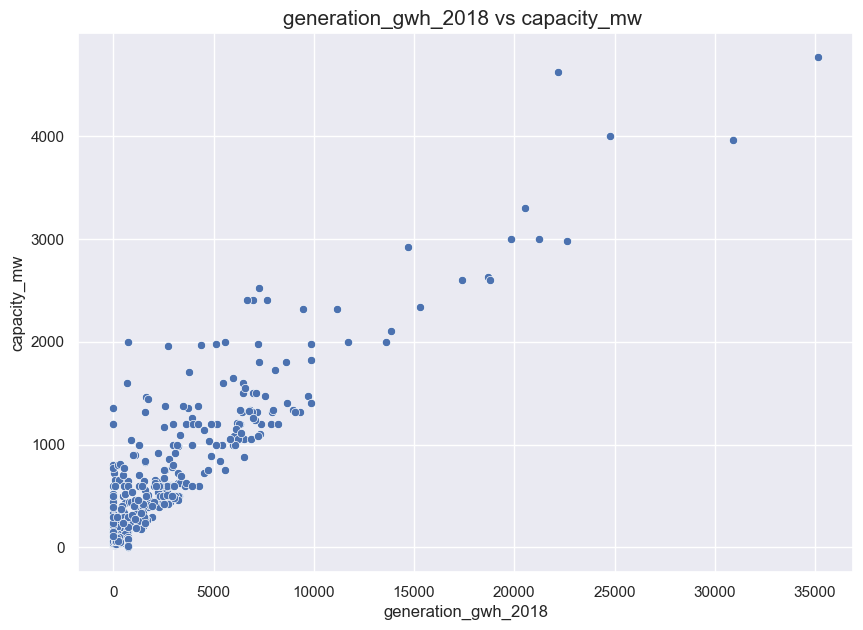

In [37]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=dataset, x='generation_gwh_2018',y='capacity_mw')

plt.title('generation_gwh_2018 vs capacity_mw ', fontsize=15)

plt.show()

In [38]:
#with higher capacity, generation_gwh_2017 also incresing.

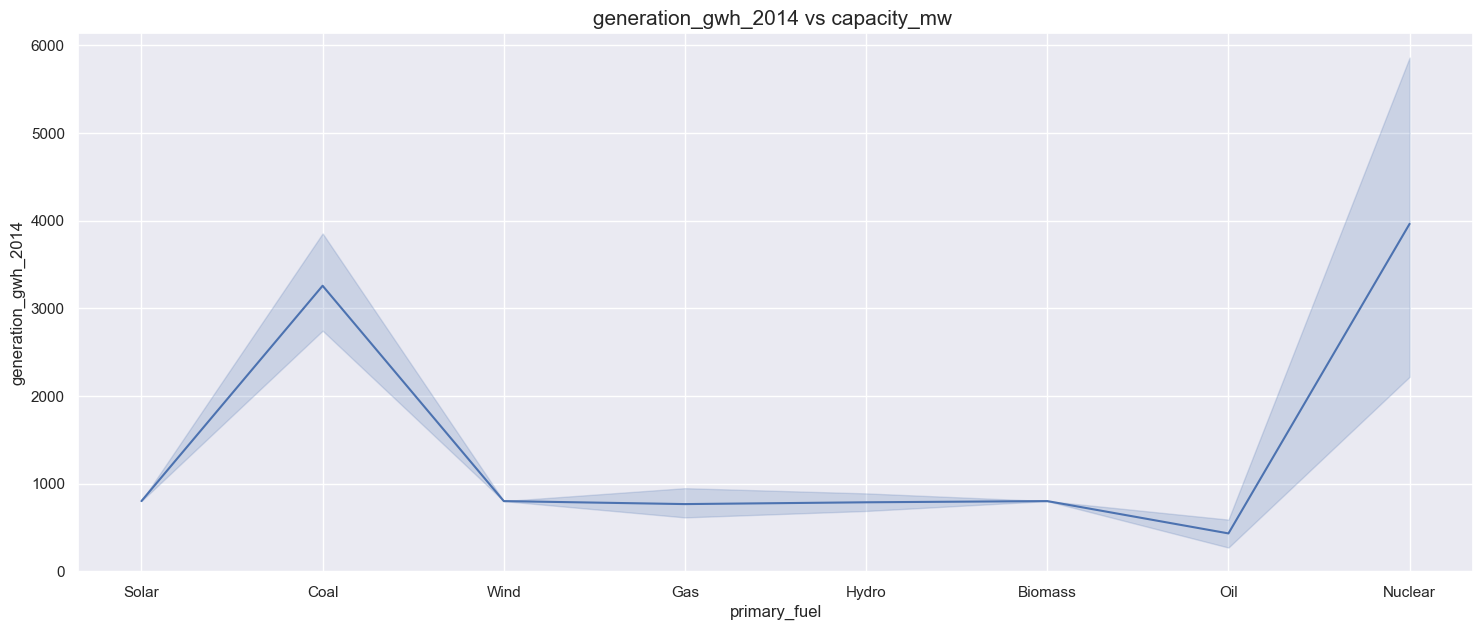

In [39]:
plt.figure(figsize=(18,7))
sns.lineplot(data=dataset, x='primary_fuel',y='generation_gwh_2014')

plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)

plt.show()

#We can see coal is the primary fuel for power generation.

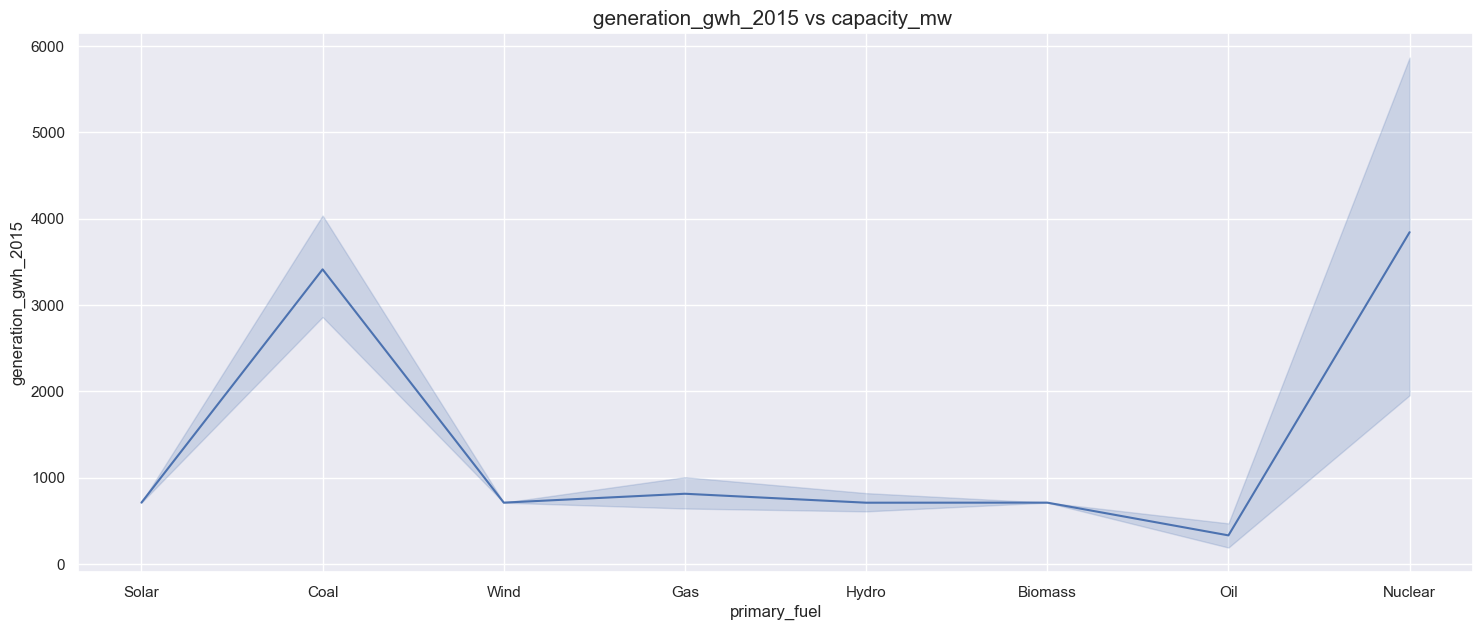

In [40]:
plt.figure(figsize=(18,7))
sns.lineplot(data=dataset, x='primary_fuel',y='generation_gwh_2015')

plt.title('generation_gwh_2015 vs capacity_mw ', fontsize=15)

plt.show()

#We can see coal is the primary fuel for power generation.

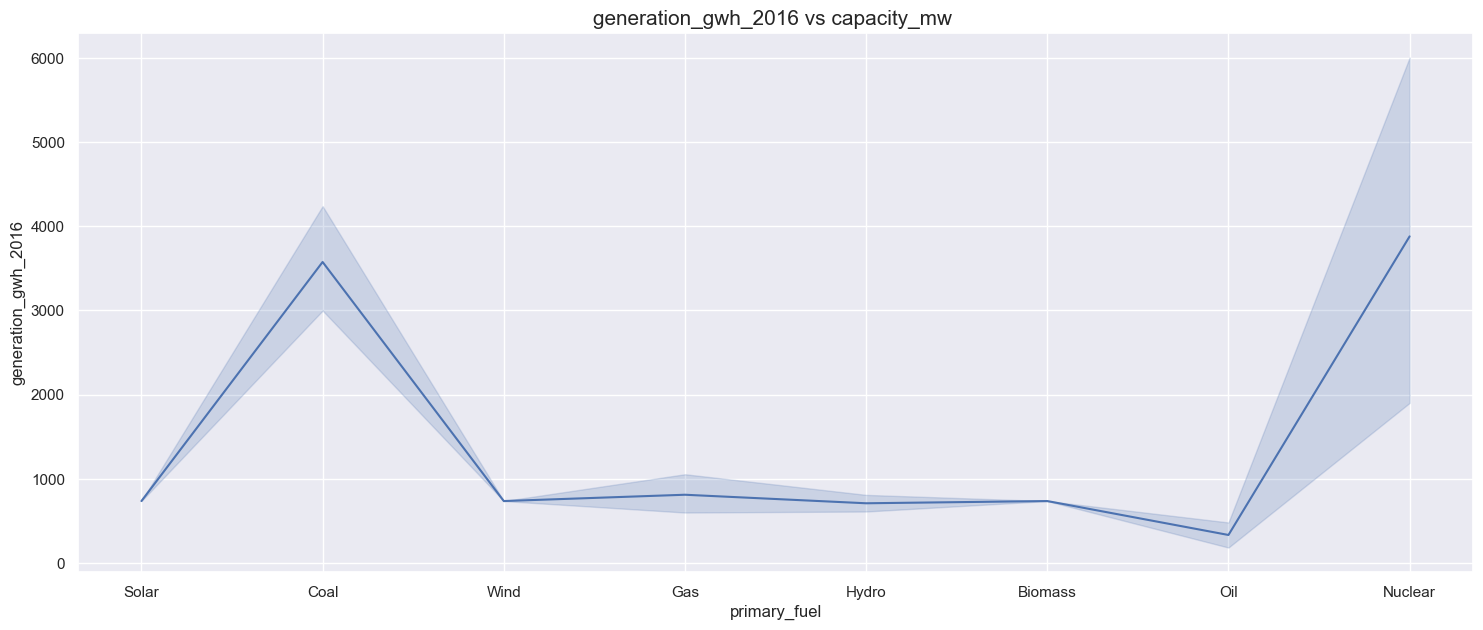

In [41]:
plt.figure(figsize=(18,7))
sns.lineplot(data=dataset, x='primary_fuel',y='generation_gwh_2016')

plt.title('generation_gwh_2016 vs capacity_mw ', fontsize=15)

plt.show()

#We can see coal is the primary fuel for power generation.

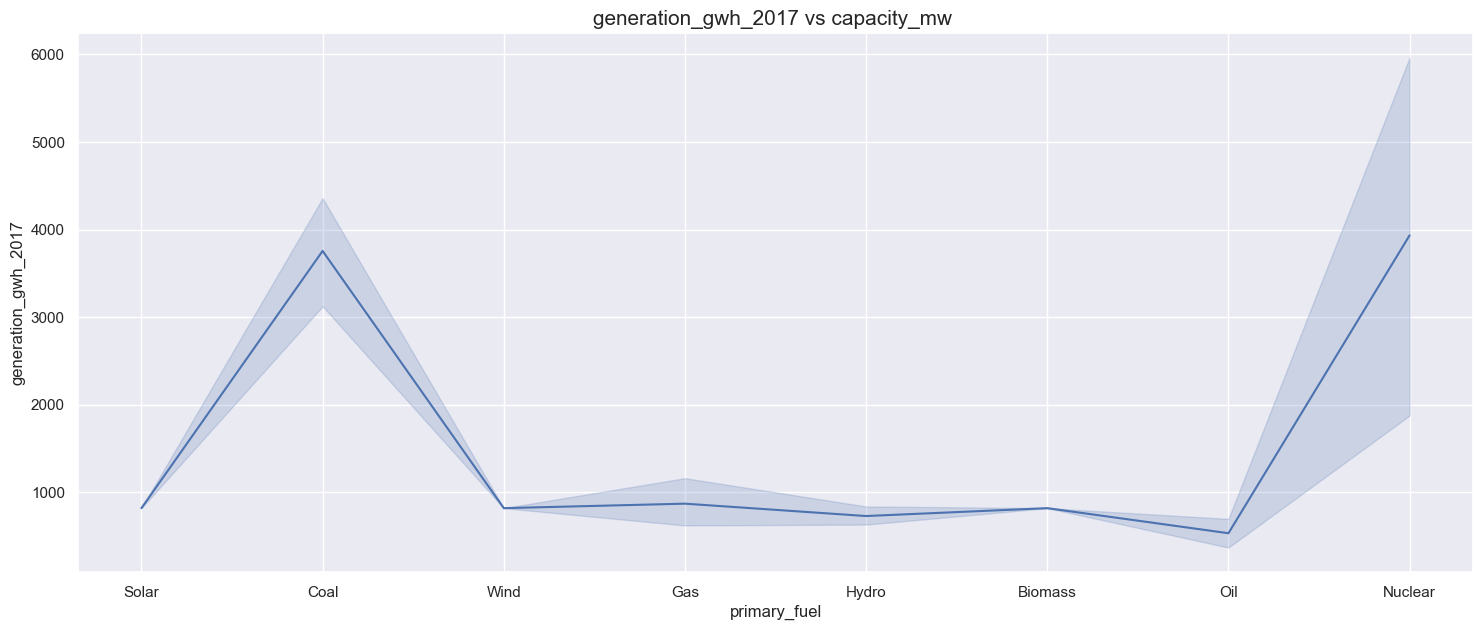

In [42]:
plt.figure(figsize=(18,7))
sns.lineplot(data=dataset, x='primary_fuel',y='generation_gwh_2017')

plt.title('generation_gwh_2017 vs capacity_mw ', fontsize=15)

plt.show()

#We can see coal is the primary fuel for power generation.

In [43]:
dataset.head(2)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.000000,Solar Paces,801.123775,711.181225,737.20545,817.97725,751.644375
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,1997.091082,Ultratech Cement ltd,801.123775,711.181225,737.20545,817.97725,751.644375


# Multivariate analysis

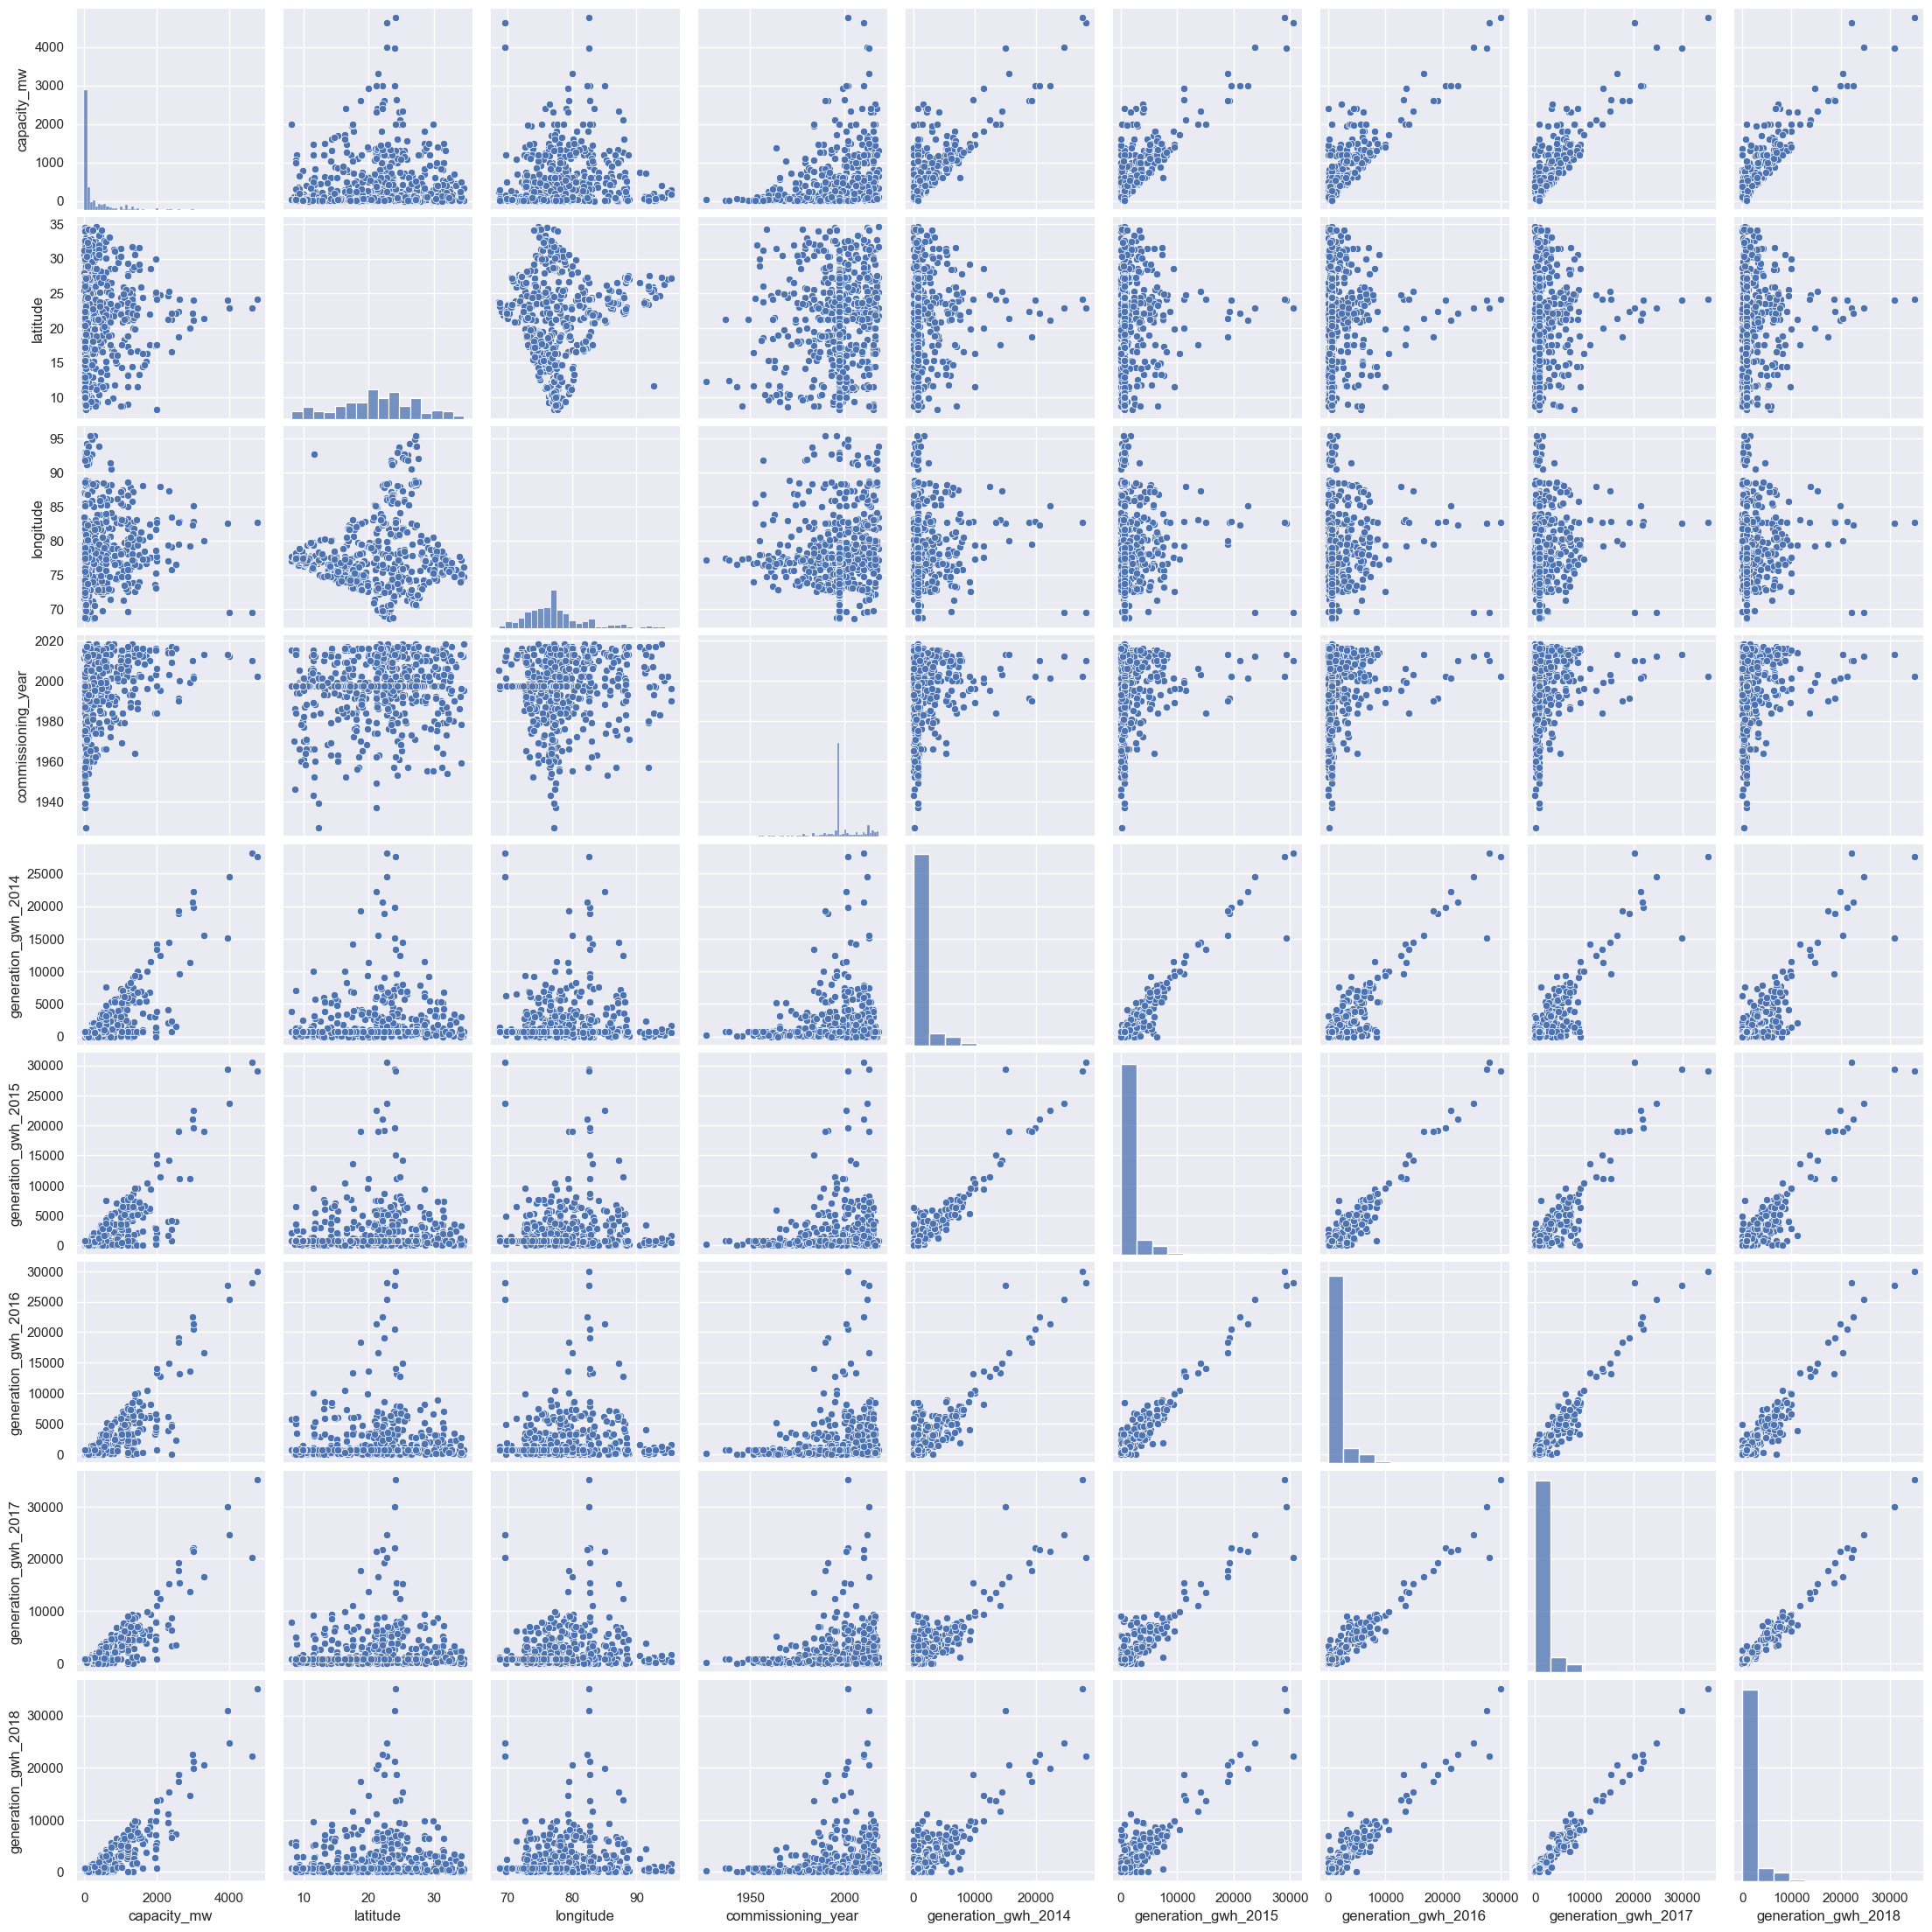

In [44]:
sns.pairplot(dataset)

# EDA Summary


'''capacity_mw: we can see capacity is mostly dependent on Coal.
    
latitude & longitude : They are not playing very good role in capacity_mw.
    
primary_fuel: Mostly Coal is used as primary fuel.
    
commissioning_year: we can see capacity incerases after 2000.
    
generation_gwh_2013-2017: we can see generation growth is almost same for each year'''

# Data Processing


In [45]:
'''Here we can see, name, gppd_idnr, owner, commissioning_year are not playing good role, we can drop these columns.'''

'Here we can see, name, gppd_idnr, owner, commissioning_year are not playing good role, we can drop these columns.'

In [46]:
dataset.drop(['name','gppd_idnr','owner','commissioning_year'], axis=1, inplace= True)

# Encoding Target columns

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['primary_fuel']=le.fit_transform(dataset['primary_fuel'])

In [48]:
dataset.head(3)

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.20545,817.97725,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.20545,817.97725,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.20545,817.97725,751.644375


In [49]:
dataset.corr()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.793497,0.819676,0.853008,0.868338,0.884840
latitude,0.050984,1.000000,0.036362,-0.010204,0.058594,0.053869,0.047677,0.057897,0.055216
longitude,0.195882,0.036362,1.000000,-0.347948,0.104649,0.121513,0.143459,0.151712,0.155063
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,-0.240656,-0.249304,-0.259708,-0.263599,-0.271198
generation_gwh_2014,0.793497,0.058594,0.104649,-0.240656,1.000000,0.963719,0.935067,0.904075,0.895143
generation_gwh_2015,0.819676,0.053869,0.121513,-0.249304,0.963719,1.000000,0.973231,0.940229,0.933161
generation_gwh_2016,0.853008,0.047677,0.143459,-0.259708,0.935067,0.973231,1.000000,0.973909,0.964988
generation_gwh_2017,0.868338,0.057897,0.151712,-0.263599,0.904075,0.940229,0.973909,1.000000,0.986685
generation_gwh_2018,0.884840,0.055216,0.155063,-0.271198,0.895143,0.933161,0.964988,0.986685,1.000000


<AxesSubplot: >

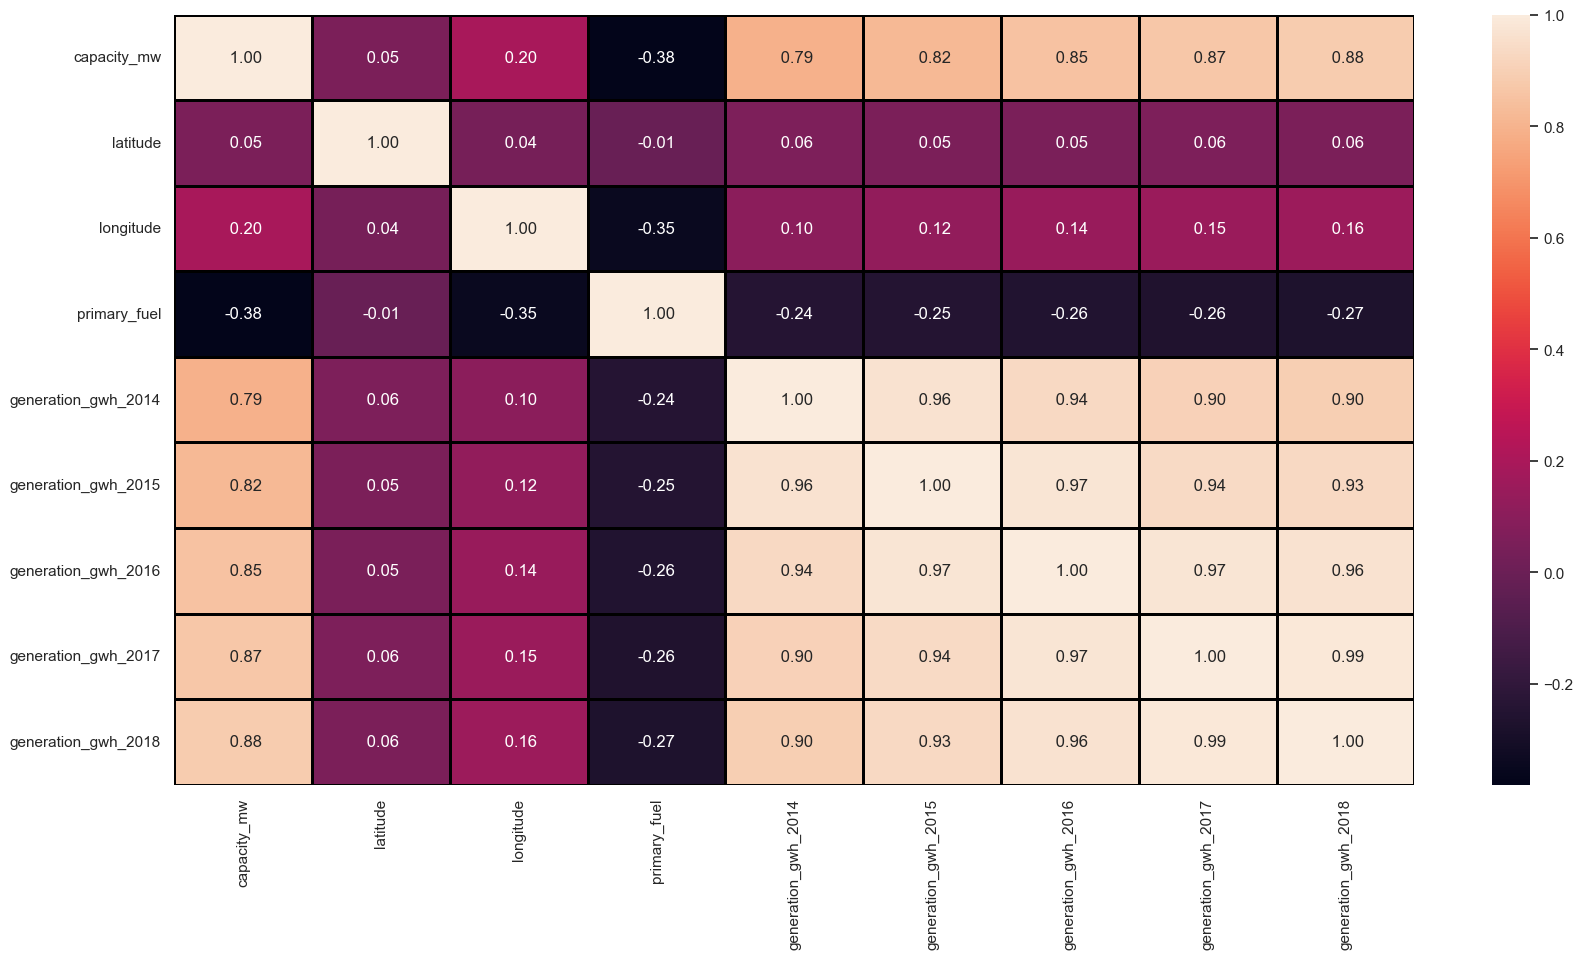

In [50]:
plt.figure(figsize=(20,10))

sns.heatmap(dataset.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

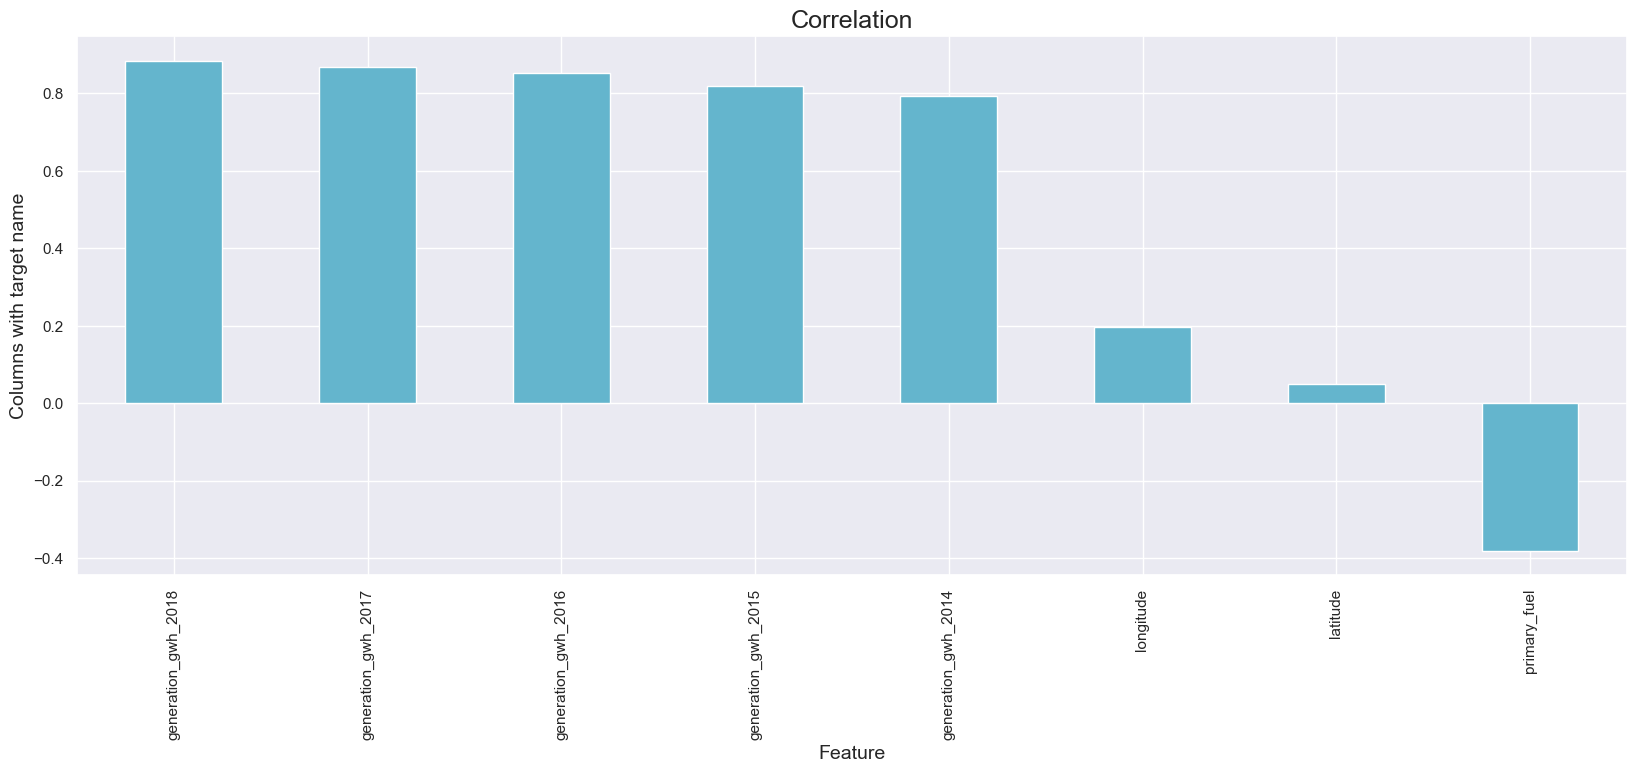

In [51]:
plt.figure(figsize=(20,7))
dataset.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

'''Here we can see only primary fuel is negative correlated with capacity megawatt, all othere parameters are having strong positve correlation.

From heat map we can see generation growth columns are highly correlacted with each other.'''

In [52]:
out=['capacity_mw','latitude','longitude','generation_gwh_2016','primary_fuel','generation_gwh_2015','generation_gwh_2017','generation_gwh_2018','generation_gwh_2014']

In [53]:
dataset[out]

,capacity_mw,latitude,longitude,generation_gwh_2016,primary_fuel,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018,generation_gwh_2014
0,2.5,28.1839,73.2407,737.205450,6,711.181225,817.977250,751.644375,801.123775
1,98.0,24.7663,74.6090,737.205450,1,711.181225,817.977250,751.644375,801.123775
2,39.2,21.9038,69.3732,737.205450,7,711.181225,817.977250,751.644375,801.123775
3,135.0,23.8712,91.3602,886.004428,2,843.747000,663.774500,626.239128,617.789264
4,1800.0,21.9603,82.4091,6243.000000,1,5916.370000,5385.579736,7279.000000,3035.550000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,233.596650,1,0.994875,865.400000,686.500000,801.123775
903,3.0,12.8932,78.1654,737.205450,6,711.181225,817.977250,751.644375,801.123775
904,25.5,15.2758,75.5811,737.205450,7,711.181225,817.977250,751.644375,801.123775
905,80.0,24.3500,73.7477,737.205450,1,711.181225,817.977250,751.644375,801.123775


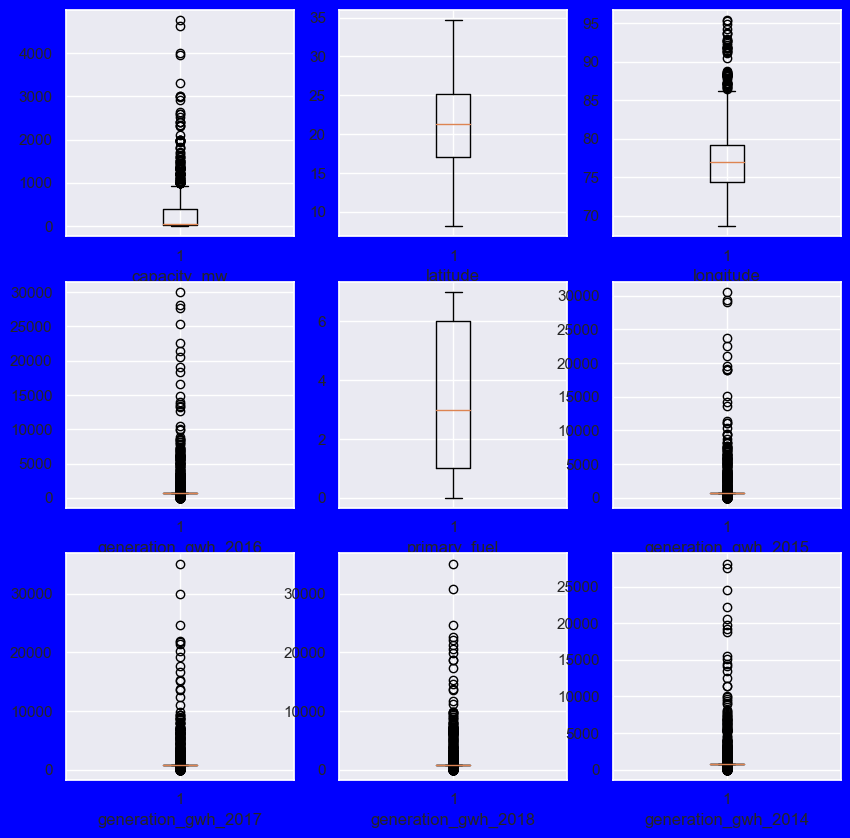

In [54]:
plt.figure(figsize=(10,10),facecolor="blue")
plotnumber=1
for i in dataset[out]:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.boxplot(dataset[out][i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

#Here we can see boxplot indicates that we have outliers, these are present mostly in generation_gwh columns.

# Removing Outliers

In [55]:
from scipy.stats import zscore
z= np.abs(zscore(dataset))

In [56]:
threshold= 3 
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       179, 183, 209, 209, 209, 209, 209, 209, 244, 308, 308, 308, 308,
       308, 308, 323, 333, 340, 360, 363, 364, 364, 364, 364, 364, 364,
       375, 416, 427, 482, 482, 493, 493, 493, 493, 493, 493, 494, 494,
       494, 494, 494, 494, 499, 519, 532, 546, 577, 623, 638, 648, 648,
       648, 648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695,
       695, 695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724,
       726, 726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786,
       788, 808, 808, 808, 808, 808, 808, 818, 847, 880, 880, 880, 880,
       880, 880], dtype=int64), array([0, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 2, 2, 0, 4, 5, 6, 7, 8, 2,
       0, 4, 5, 6, 7, 8, 2, 2, 2, 2, 0, 0, 4, 5, 6, 7, 8, 0, 2, 2, 0, 8,
       0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 2, 2, 4, 2, 2, 4, 2, 0, 4, 5,
       6, 7, 8, 0, 4, 5, 6, 7, 8, 0, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5,
       6, 7, 8, 0, 4, 5, 6,

In [57]:
df=dataset[(z<3).all(axis=1)]
print(dataset.shape)
print(df.shape)

(907, 9)
(866, 9)


In [58]:
Loss_percentage=(907-866)/907*100
print(Loss_percentage)

4.5203969128996695


'''Data loss is less than the 1ess than 10 percent, we can proceed with new data.'''

In [59]:
df.shape

(866, 9)

In [60]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.20545,817.97725,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.20545,817.97725,751.644375


### Removing skewness

In [61]:
df.skew()

capacity_mw            2.029125
latitude              -0.110925
longitude              0.935570
primary_fuel           0.417203
generation_gwh_2014    2.997212
generation_gwh_2015    2.798104
generation_gwh_2016    2.736037
generation_gwh_2017    2.633766
generation_gwh_2018    2.701508
dtype: float64

In [62]:
from sklearn.preprocessing import power_transform 

# Divide the data into features and vectors.

x=df.drop(['capacity_mw'], axis=1)
y=df.iloc[:,0]

x=power_transform(x, method='yeo-johnson')

In [63]:
X=pd.DataFrame(data=x)

In [64]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 866, dtype: float64

## Scaling the data Using StandardScaler.

In [65]:
from sklearn.preprocessing import StandardScaler
SDc=StandardScaler()
X=SDc.fit_transform(X)

In [66]:
'''Our data is now scaled, in next step we will check multicollinearity.'''

'Our data is now scaled, in next step we will check multicollinearity.'

# VIF calculation

In [67]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
dataset.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [69]:
dfx=pd.DataFrame(data=X, columns=['latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'])

In [70]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [71]:
calc_vif(dfx)

,variables,VIF FACTOR
0,latitude,1.023721
1,longitude,1.174497
2,primary_fuel,1.194083
3,generation_gwh_2013,3.576558
4,generation_gwh_2014,6.279617
5,generation_gwh_2015,10.757296
6,generation_gwh_2016,9.758001
7,generation_gwh_2017,9.231482


In [72]:
dfx.drop('generation_gwh_2016', axis=1, inplace=True )

In [73]:
calc_vif(dfx)

,variables,VIF FACTOR
0,latitude,1.023069
1,longitude,1.170270
2,primary_fuel,1.194041
3,generation_gwh_2013,3.573556
4,generation_gwh_2014,6.231846
5,generation_gwh_2015,9.384808
6,generation_gwh_2017,5.186089


In [74]:
x=dfx

#Vif is less than 10 we can proceed for model development

# Model Development

In [75]:

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [76]:
lr=LinearRegression()
for i in range(0, 100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.30)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random state",i, "The model perform very well")
        print("At random State:",i)
        print("Training r2_score",r2_score(y_train,pred_train)*100)
        print("Testing r2 score ",r2_score(y_test,pred_test)*100)

At Random state 79 The model perform very well
At random State: 79
Training r2_score 44.60527056969884
Testing r2 score  44.62216731068991


In [77]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y, test_size=0.30, random_state= 912)

In [78]:
lr.fit(x_train_b,y_train_b)
pred_test=lr.predict(x_test_b)

print('Linear model accuracy is: ',r2_score(y_test_b,pred_test))

Linear model accuracy is:  0.4707404207175022


# Lets check model for cross validation


### Cross Validation of Model

In [79]:
test_accuracy= r2_score(y_test_b,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 42.01304198312335 and Accuracy score is 47.07404207175022
At cross fold 3 the Cross Val score is 40.56325621982471 and Accuracy score is 47.07404207175022
At cross fold 4 the Cross Val score is 40.7034974827859 and Accuracy score is 47.07404207175022
At cross fold 5 the Cross Val score is 40.882174077088926 and Accuracy score is 47.07404207175022
At cross fold 6 the Cross Val score is 41.24525561867055 and Accuracy score is 47.07404207175022
At cross fold 7 the Cross Val score is 37.92815497447877 and Accuracy score is 47.07404207175022
At cross fold 8 the Cross Val score is 40.1302059173423 and Accuracy score is 47.07404207175022
At cross fold 9 the Cross Val score is 39.837022896212886 and Accuracy score is 47.07404207175022


In [80]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_test))
print('Mean Squared Error:', mean_squared_error(y_test_b,pred_test))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,pred_test)))

Error:
Mean Absolute Error: 222.5588779427736
Mean Squared Error: 86797.88249588294
Root Mean Square Error: 294.6148035925604


''''''We can see cv score is very low, But it is having less diffrence with respect to other cv.

So we can take cv=8, But model performance is low, lets try anaother model.''''''



# 2. Lasso

In [81]:
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=8,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 

R2 score: 47.20226293538599
Cross val Score : 40.63865163705673


In [82]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 222.28678824839932
Mean Squared Error: 86587.60194752773
Root Mean Square Error: 294.25771348858086


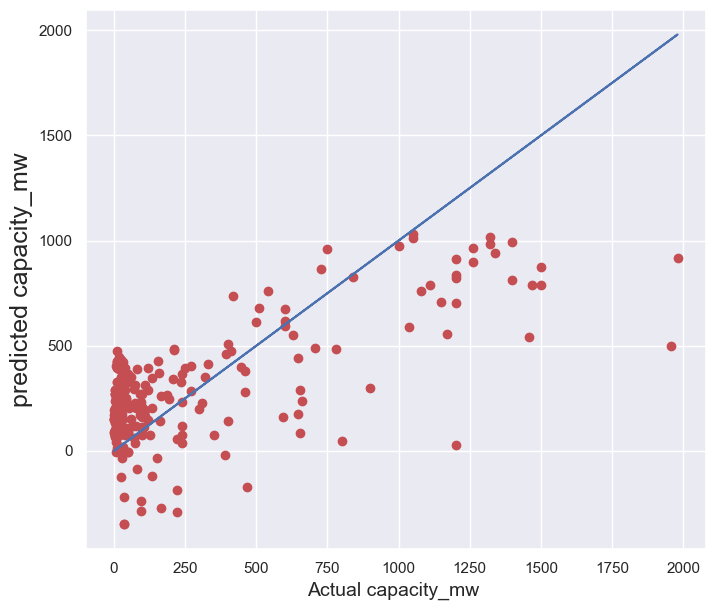

In [83]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw ', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

# 3. Ridge

In [84]:
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,y,cv=8, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  47.08553270602719
Cross val Score 40.169256964489406


In [85]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))


Error:
Mean Absolute Error: 222.56136738778855
Mean Squared Error: 86779.03800514877
Root Mean Square Error: 294.58282028174824


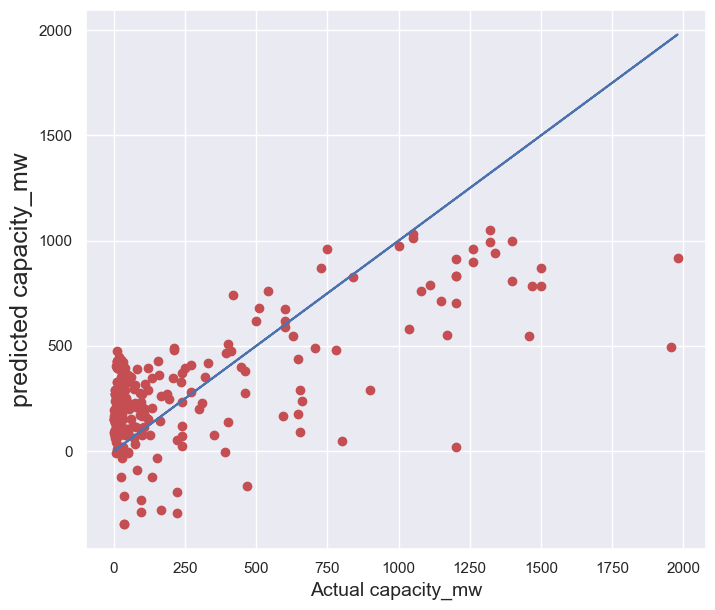

In [86]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rd_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

# 3. Decision TreeRegressor

In [87]:
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,y,cv=8, scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 67.42209418167148
Cross Val Score: 56.34361559650066


In [88]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 116.28382307692308
Mean Squared Error: 53427.3417406
Root Mean Square Error: 231.14355223669986


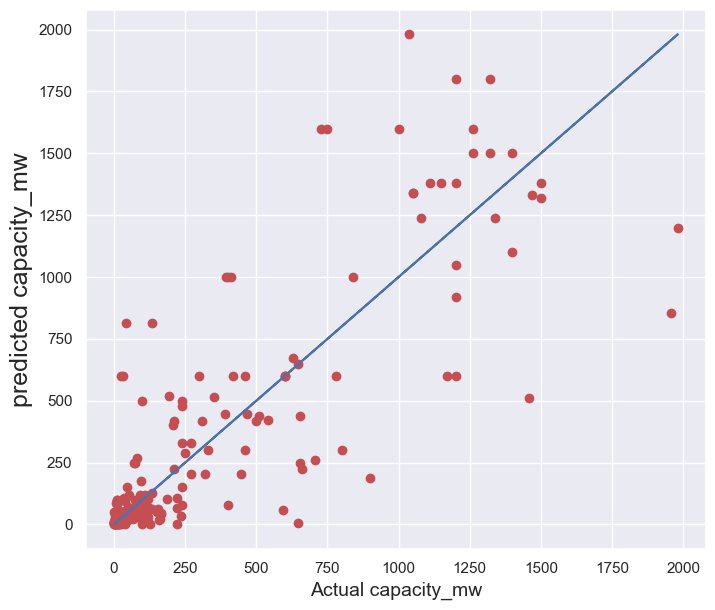

In [89]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= dt_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

# 4. KNeighborsRegressor

In [90]:
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score:', kn_score*100)

kn_cvscore=cross_val_score(kn,x,y, cv=8, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 77.64476396409827
Cross val Score : 74.38173341307164


In [91]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 97.76567076923078
Mean Squared Error: 36662.29628271354
Root Mean Square Error: 191.47400941828514


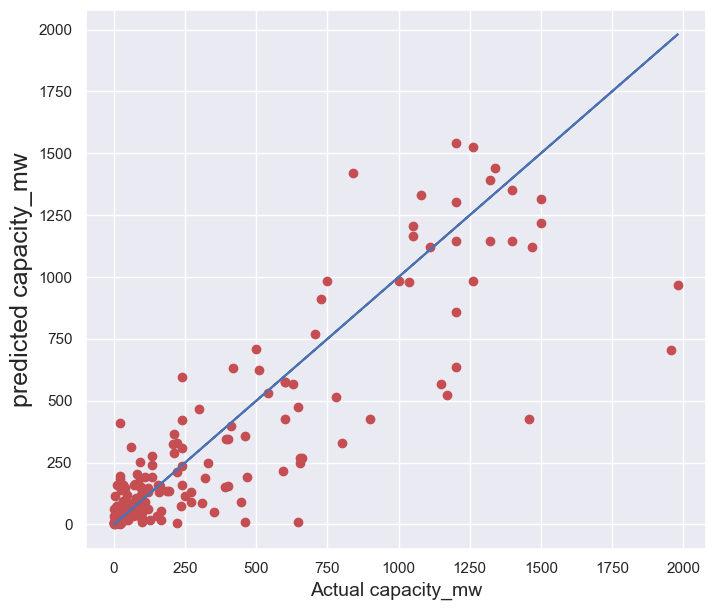

In [92]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= kn_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

# 5. Ensemble Techniques


In [93]:
rf=RandomForestRegressor()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=8, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 83.20141661173209
Cross val Score : 76.30362227466996


In [94]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 85.10919804534451
Mean Squared Error: 27549.45822631779
Root Mean Square Error: 165.9802946928273


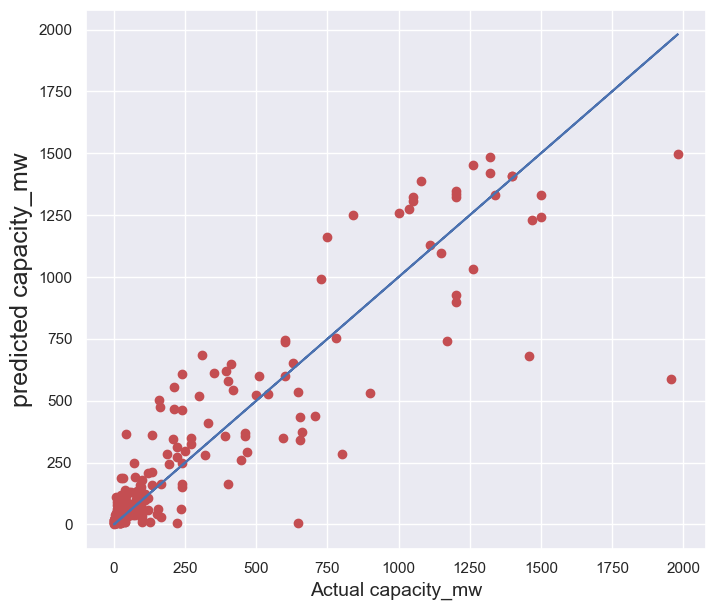

In [95]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rf_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()

# 6. GradientBoostingRegressor

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=8, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )



R2 score: 83.20141661173209
Cross val Score : 73.23449129833953


In [97]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))



Error:
Mean Absolute Error: 85.10919804534451
Mean Squared Error: 27549.45822631779
Root Mean Square Error: 165.9802946928273


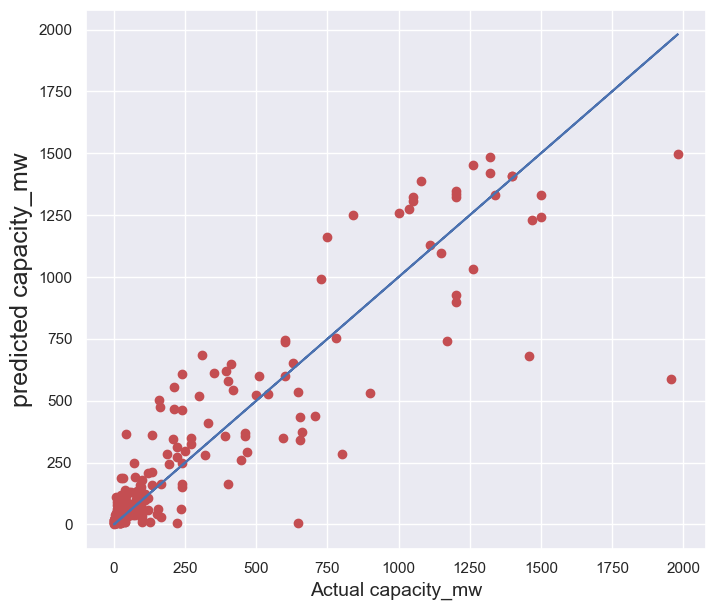

In [98]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= gb_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw', fontsize= 14 )
plt.ylabel('predicted capacity_mw', fontsize= 18)
plt.show()


#RandomForestRegressor is stil the best model with R2 score: 78.9091 Cross val Score : 77.6367, lets try Hypertuning of the model.

# HyperParameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse', 'absolute_error','squared_error','poisson'],'max_features':['auto', 'sqrt', 'log2'],'n_estimators':[100,200,300,400,500], 'min_samples_split':[1,2,3,4,10]}
rf=RandomForestRegressor()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)



{'criterion': 'poisson', 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}


In [100]:
rf=RandomForestRegressor(criterion='poisson', max_features='sqrt', min_samples_split=2, n_estimators=300)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=8, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100)

R2 score: 84.20479860262596
Cross val Score : 77.40062200709676


# We can see RandomForestRegressor Having very less diffrence in R2 score and Cross Val Score. we can consider this our best model.

## Saving Best Model

In [101]:
import pickle
filename='Evaluation_Project-Global_Power_Plant_Database_regression.pkl'
pickle.dump(rf,open(filename,'wb'))

In [102]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,14.4,52.456833
1,90.0,120.954000
2,96.0,101.318667
3,165.0,281.648667
4,10.5,33.273333
...,...,...
255,110.0,118.260833
256,1.0,11.186083
257,20.0,6.993300
258,24.0,24.478000


In [103]:
# Lets predict the primary fuel.

In [104]:
df

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,801.123775,711.181225,737.205450,817.977250,751.644375


In [105]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.20545,817.97725,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.20545,817.97725,751.644375


In [106]:
# deviding into fetures and target. 
x=df.drop('primary_fuel', axis=1)
y=df['primary_fuel']

In [107]:
x.skew()

capacity_mw            2.029125
latitude              -0.110925
longitude              0.935570
generation_gwh_2014    2.997212
generation_gwh_2015    2.798104
generation_gwh_2016    2.736037
generation_gwh_2017    2.633766
generation_gwh_2018    2.701508
dtype: float64

In [108]:
from sklearn.preprocessing import power_transform 
x=power_transform(x, method='yeo-johnson')

In [109]:
X2=pd.DataFrame(data=x)

# Scaling the data Using StandardScaler.

In [110]:
SDc=StandardScaler()
X2=SDc.fit_transform(X2)

In [111]:
X2

array([[-1.6833227 ,  1.15626742, -0.93885467, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [ 0.24978411,  0.59104013, -0.51903111, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [-0.25138397,  0.12112001, -2.37998905, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       ...,
       [-0.48802138, -0.95235366, -0.24462176, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [ 0.13943645,  0.52249096, -0.77847826, ..., -0.02668675,
        -0.0118393 , -0.03537354],
       [-0.72678912, -1.79828311,  0.23982923, ..., -0.02668675,
        -0.0118393 , -0.03537354]])

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [114]:
dfy=pd.DataFrame(data=X2, columns=['capacity_mw','latitude', 'longitude',
        'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018'])

In [115]:
dfy

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.683323,1.156267,-0.938855,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
1,0.249784,0.591040,-0.519031,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
2,-0.251384,0.121120,-2.379989,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
3,0.422961,0.443736,2.428832,-0.249081,0.115639,0.126619,-0.178492,-0.175228
4,1.768702,0.130362,1.244663,1.448967,2.320849,2.317527,2.037720,2.431710
...,...,...,...,...,...,...,...,...
861,1.709760,-0.788809,0.211004,-0.023489,-2.472611,-0.831122,0.034848,-0.105704
862,-1.602083,-1.332201,0.400757,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
863,-0.488021,-0.952354,-0.244622,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374
864,0.139436,0.522491,-0.778478,-0.023489,-0.028443,-0.026687,-0.011839,-0.035374


In [116]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [117]:
calc_vif(dfy)

,variables,VIF FACTOR
0,capacity_mw,1.279531
1,latitude,1.024334
2,longitude,1.148649
3,generation_gwh_2014,3.582231
4,generation_gwh_2015,6.286462
5,generation_gwh_2016,10.754176
6,generation_gwh_2017,9.760924
7,generation_gwh_2018,9.241425


In [118]:
dfy.drop('generation_gwh_2016', axis=1, inplace=True)


In [119]:
calc_vif(dfy)

,variables,VIF FACTOR
0,capacity_mw,1.279067
1,latitude,1.021700
2,longitude,1.142608
3,generation_gwh_2014,3.579527
4,generation_gwh_2015,4.384862
5,generation_gwh_2017,8.516949
6,generation_gwh_2018,8.647218


In [120]:
x=dfy

# Model Development

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Chosing Best Random State

In [122]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)

At Random state  163 The Model performing Well
At Random State 163
Training Accuracy score is- 51.73410404624278
Testing Accuracy Score is- 51.724137931034484
At Random state  810 The Model performing Well
At Random State 810
Training Accuracy score is- 51.73410404624278
Testing Accuracy Score is- 51.724137931034484


In [123]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=5,test_size=0.20)
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))


0.4885057471264368


In [124]:

from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[ 0  0  0  1  0  0  0  6]
 [ 0 18  1 17  0  0  1  4]
 [ 0  6  4  2  0  1  0  0]
 [ 0  8  0 32  0  0  6  5]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  2  0  1  0  2]
 [ 0  0  0  7  0  0 15  5]
 [ 0  1  0  5  0  0  8 15]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.53      0.44      0.48        41
           2       0.80      0.31      0.44        13
           3       0.48      0.63      0.55        51
           4       0.00      0.00      0.00         1
           5       0.50      0.20      0.29         5
           6       0.50      0.56      0.53        27
           7       0.41      0.52      0.45        29

    accuracy                           0.49       174
   macro avg       0.40      0.33      0.34       174
weighted avg       0.49      0.49      0.47       174



# Cross validation of model

In [125]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j, scoring='accuracy')
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 49.07621247113164
Accuracy Score:- 48.85057471264368


at cv:- 3
Cross Validation scre is:- 49.534233628091755
Accuracy Score:- 48.85057471264368


at cv:- 4
Cross Validation scre is:- 49.53490356716163
Accuracy Score:- 48.85057471264368


at cv:- 5
Cross Validation scre is:- 50.804597701149426
Accuracy Score:- 48.85057471264368


at cv:- 6
Cross Validation scre is:- 50.569923371647505
Accuracy Score:- 48.85057471264368


at cv:- 7
Cross Validation scre is:- 51.143643924918514
Accuracy Score:- 48.85057471264368


at cv:- 8
Cross Validation scre is:- 51.14572714916752
Accuracy Score:- 48.85057471264368


at cv:- 9
Cross Validation scre is:- 50.79944635357007
Accuracy Score:- 48.85057471264368




# SVC

In [126]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=8, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)


Accuracy_core: 59.195402298850574
Cross val Score : 59.80610771321781


In [127]:

print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[ 0  0  0  0  0  0  0  7]
 [ 0 31  1  2  0  0  2  5]
 [ 0  6  3  3  0  1  0  0]
 [ 0  8  0 34  0  0  2  7]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  2  0  0  0  0  2]
 [ 0  2  0  3  0  0 13  9]
 [ 0  2  0  1  0  0  4 22]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.61      0.76      0.67        41
           2       0.50      0.23      0.32        13
           3       0.79      0.67      0.72        51
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.62      0.48      0.54        27
           7       0.42      0.76      0.54        29

    accuracy                           0.59       174
   macro avg       0.37      0.36      0.35       174
weighted avg       0.58      0.59      0.57       174



# Ensemble Techniques


# KNeighborsClassifier

In [128]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=8, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )


accuracy_score: 64.36781609195403
Cross val Score : 65.36697247706422


In [129]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[ 6  0  0  0  0  0  0  1]
 [ 1 32  0  3  0  0  1  4]
 [ 0  6  1  4  0  2  0  0]
 [ 1  5  0 36  0  0  1  8]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  1  2  0  1  0  0]
 [ 1  3  0  4  0  0 15  4]
 [ 1  0  2  1  0  0  4 21]]
              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.67      0.78      0.72        41
           2       0.25      0.08      0.12        13
           3       0.72      0.71      0.71        51
           4       0.00      0.00      0.00         1
           5       0.33      0.20      0.25         5
           6       0.71      0.56      0.63        27
           7       0.55      0.72      0.63        29

    accuracy                           0.64       174
   macro avg       0.48      0.49      0.47       174
weighted avg       0.62      0.64      0.62       174



# DecisionTreeClassifier

In [130]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=8, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 66.66666666666666
Cross val score is: 64.20425586136595


In [131]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[ 3  1  1  0  0  0  0  2]
 [ 1 28  2  5  1  1  1  2]
 [ 0  2  8  0  0  1  2  0]
 [ 2  4  0 37  1  1  1  5]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  0  0  4  0  0]
 [ 2  5  0  3  0  0 14  3]
 [ 0  1  0  3  0  0  3 22]]
              precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.67      0.68      0.67        41
           2       0.67      0.62      0.64        13
           3       0.77      0.73      0.75        51
           4       0.00      0.00      0.00         1
           5       0.57      0.80      0.67         5
           6       0.67      0.52      0.58        27
           7       0.65      0.76      0.70        29

    accuracy                           0.67       174
   macro avg       0.55      0.57      0.55       174
weighted avg       0.68      0.67      0.67       174



#accuracy_score 67.24137931034483

#Cross val score is: 63.96958885490995

#Both accuracy score and Cross val score having less score, Model performance is very good.

# RandomForestClassifier

In [132]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=8, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  75.28735632183908
Cross val Score : 71.01703194019709


In [133]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[ 6  0  0  0  0  0  0  1]
 [ 2 31  1  3  0  1  1  2]
 [ 0  5  6  1  0  1  0  0]
 [ 0  5  0 39  0  0  0  7]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  2  0  0  3  0  0]
 [ 0  1  0  3  0  0 20  3]
 [ 1  0  0  1  0  0  1 26]]
              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.72      0.76      0.74        41
           2       0.67      0.46      0.55        13
           3       0.83      0.76      0.80        51
           4       0.00      0.00      0.00         1
           5       0.60      0.60      0.60         5
           6       0.91      0.74      0.82        27
           7       0.67      0.90      0.76        29

    accuracy                           0.75       174
   macro avg       0.63      0.63      0.63       174
weighted avg       0.76      0.75      0.75       174



In [134]:
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=8, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  37.93103448275862
Cross val Score : 34.87618926265716


In [135]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[ 0  0  0  0  0  0  7  0]
 [ 0 18  0  7  2  2 12  0]
 [ 0  2  0  6  2  2  1  0]
 [ 0  7  0 21  0  0 23  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  1  0  2  1  0]
 [ 0  0  0  2  0  0 25  0]
 [ 0  0  0  4  0  0 25  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.64      0.44      0.52        41
           2       0.00      0.00      0.00        13
           3       0.51      0.41      0.46        51
           4       0.00      0.00      0.00         1
           5       0.33      0.40      0.36         5
           6       0.27      0.93      0.41        27
           7       0.00      0.00      0.00        29

    accuracy                           0.38       174
   macro avg       0.22      0.27      0.22       174
weighted avg       0.35      0.38      0.33       174



#accuracy_score:  37.93103448275862

#Cross val Score : 34.87618926265716

#Score is very low, but RandomForestClassifier is still best.

# GaussianNB

In [136]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=8, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 53.44827586206896
Cross Val Score is : 53.58583927964662


#Model performance is poor RandomForestClassifier is still best model.



# Hyperparameter Tuning of the model

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [100, 300,400, 500], 'criterion':['gini', 'entropy'], 'max_features':['auto','sqrt', 'log2'], 'min_samples_split':[2, 5, 10, 15, 100],'max_depth':[5, 8, 15, 25, 30] }
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)


{'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 100}


In [142]:

rf=RandomForestClassifier(criterion='entropy',max_depth=25, max_features='sqrt', min_samples_split=5, n_estimators=100 )
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=8,scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  72.98850574712644
Cross val Score : 72.75208120965002


In [143]:
import pickle
filename="Evaluation_Project-Global_Power_Plant_Database_logic.pkl "
pickle.dump(dt, open(filename,'wb'))


In [144]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,2,1
1,3,1
2,3,1
3,7,3
4,3,3
...,...,...
169,7,7
170,3,0
171,3,6
172,6,7
